In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from edu.javerianacali.create_dataset import CreateDataSet
from edu.javerianacali.model.ccn_model import ConvulationalNeuralNetwork
from edu.javerianacali.model.logistic_regression_model import LogisticRegressionModel
from edu.javerianacali.process_images import ProcessImages
from edu.javerianacali.data_aumentation import DataAugmentation
from edu.javerianacali.model.svm_model import SupportVectorMachineModel
directorio = "/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets"


2024-04-15 20:41:19.947997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 20:41:19.974326: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 20:41:19.974374: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 20:41:19.974403: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 20:41:19.980082: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 20:41:19.980708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# AUMENTO DE DATOS

In [2]:
# Cargar el modelo desde un archivo
from keras.models import load_model
modelo = load_model('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')

2024-04-07 15:05:51.893057: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:51.948649: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:51.988393: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:52.731942: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-07 15:05:52.956881: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.


Type: <class 'numpy.ndarray'>
Shape of Image: (1100, 1200, 3)
Total Number of pixels: 3960000
Image data type: uint8
Dimension: 3


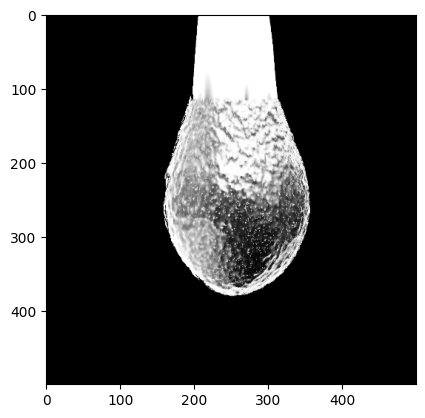

1/1 [==============================] - 0s 54ms/step
[[0.18644099 0.81355906]]


In [10]:

from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/home/maucasco/Downloads/buena.png'
imagen = cv2.imread(img_path)[100:, :]
imagen_sin_texto,aguacate_solo, redimenciada = ProcessImages().procesar(imagen,500,500)
img_array = image.img_to_array(redimenciada)
if img_array.shape[-1] != 3:
    img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

plt.imshow(redimenciada, cmap='gray')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = modelo.predict(img_array)
print(predictions)

# PROCESAR INAGENES PARA MODELOS DE APRENDIZAJE SUPERVISADO

In [ ]:
path=directorio+'/poquitas'
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,96)
        ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:
create_dataset = CreateDataSet().create_dataset(directorio)
LogisticRegressionModel().prepare_dataset(directorio)
print(create_dataset[1])
LogisticRegressionModel().train_model(create_dataset[0], create_dataset[1])



In [ ]:


from edu.javerianacali.model.svm_model import SupportVectorMachineModel
create_dataset = CreateDataSet().create_dataset(directorio)
features, labels = create_dataset[0], create_dataset[1]
print(features)
SupportVectorMachineModel().train_svm_model(features, labels)


# ALGORITNOS NO SUPERVISADOS

In [ ]:
path=directorio
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,500,500)
       # ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:

CreateDataSet().create_dataset_cnn(directorio)

In [3]:
directorio = "/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from edu.javerianacali.create_dataset import CreateDataSet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
        # Crea un generador de datos de imagen con normalización




datagen = ImageDataGenerator(rescale=1./255,shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
print(directorio
+'/train')
# Carga las imágenes desde el directorio
# Asegúrate de que dentro de este directorio, las imágenes estén organizadas en subdirectorios según su etiqueta/clase
generator = datagen.flow_from_directory(
directorio+'/train',
target_size=(500, 500),  # Asegúrate de que estas dimensiones coincidan con el preprocesamiento que hiciste
batch_size=32,
class_mode='categorical' ) # Usa 'binary' si solo tienes dos clases


# Generador de datos de validación
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directorio+'/test',
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)


/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets/train
Found 764 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [4]:
import tensorflow as tf
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
modelo = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(500, 500, 3)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, (5,3), activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(128, (3, 3), activation='relu'), # Capa adicional
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),  # Capa de abandono para regularización
            Dense(2, activation='softmax')
        ])


# Aquí puedes imprimir la forma de la salida para ver cuántas neuronas necesita la siguiente capa Dense
modelo.summary()


modelo.compile(optimizer=Adam(learning_rate=0.001),  # Ajustar la tasa de aprendizaje
    loss='categorical_crossentropy',  
    metrics=['accuracy'])


historial = modelo.fit(
    generator,
    epochs=10,  # Aumentar el número de épocas
    validation_data=validation_generator
)

# Gráficos de precisión y pérdida
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])  # Precisión de validación
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])  # Pérdida de validación
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')# Añade la capa Dense según el tamaño de salida de Flatten


plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 247, 64)      30784     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 122, 123, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 121, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 128)       0

2024-04-15 21:00:49.015902: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-15 21:00:49.064186: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-15 21:00:49.101719: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.


Epoch 1/10


2024-04-15 21:00:50.304200: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.
2024-04-15 21:00:50.336953: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 235929600 exceeds 10% of free system memory.


 3/24 [==>...........................] - ETA: 1:52 - loss: 0.9217 - accuracy: 0.5833

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

2024-05-09 20:41:50.248960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'builder' from 'google.protobuf.internal' (/home/maucasco/.local/lib/python3.10/site-packages/google/protobuf/internal/__init__.py)

In [ ]:
plot_model(modelo, to_file='/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo1_cnn.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Evaluar el modelo en el conjunto de prueba o validación
# Asumiendo que tienes `validation_generator` como tu conjunto de validación/test
y_pred = modelo.predict(validation_generator)
y_test = validation_generator.classes  # Etiquetas verdaderas
y_pred = np.argmax(y_pred, axis=1)  # Convertir predicciones a etiquetas

# Matriz de confusión
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("Classification Report")
print(classification_report(y_test, y_pred))


In [ ]:
# Si y_pred es unidimensional, no necesitas indexarlo con [:, 1]
if y_pred.ndim == 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Visualización de la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt

# Crear un modelo que devuelva las activaciones de la primera capa convolucional
activation_model = Model(inputs=modelo.input, outputs=modelo.layers[0].output)

# Obtener las activaciones de la primera capa convolucional para la primera imagen en el conjunto de entrenamiento
activations = activation_model.predict(generator[0][0][0].reshape(1, 500, 500, 3))

# Visualizar las activaciones de los primeros 6 filtros
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Suponiendo que tienes todas tus imágenes y etiquetas cargadas en X e Y
# X, Y = load_data()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Crear el modelo de CNN aquí
    modelo = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(100, 130, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

    # Evaluar el modelo
    scores = modelo.evaluate(X_val, Y_val, verbose=0)
    print(f'Score for fold {fold_no}: {modelo.metrics_names[1]} of {scores[1]*100}%')
    
    fold_no += 1

In [ ]:
# Guardar el modelo en un archivo
modelo.save('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')


In [ ]:
# Cargar el modelo desde un archivo
from keras.models import load_model
modelo = load_model('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')

In [ ]:

from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/home/maucasco/Downloads/sano_tomadas.jpeg'
imagen = cv2.imread(img_path)[100:, :]
imagen_sin_texto,aguacate_solo, redimenciada = ProcessImages().procesar(imagen,500,500)
img_array = image.img_to_array(redimenciada)
if img_array.shape[-1] != 3:
    img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

plt.imshow(redimenciada, cmap='gray')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = modelo.predict(img_array)
print(predictions)